# Prototype Climate Impact Lab Interface

## Workspace Setup

Import some python modules

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import prototype

## Connect to the API

Authenticate with the [prototype] API, and define how you want to use the system

In [2]:
api = prototype.ClimateImpactLabDataAPI(
    username='mdelgado', 
    password='*********')

api.configure(sample='median', location='OSDC', priority='low')

API configuration updated


## Retrieve formatted Climate Impact Lab variables

In [3]:
# mortality regression parameters
alpha  = api.get_variable('alpha')
gamma1 = api.get_variable('gamma1')
gamma2 = api.get_variable('gamma2')
gamma3 = api.get_variable('gamma3')

# GCP-wide socioeconomic parameters
avg_days_per_bin = api.get_variable('avg_days_per_bin')
gdp_per_capita   = api.get_variable('gdppc')
pop_density      = api.get_variable('popdens')

# Climate variables
temp = api.get_variable('temp')

In [4]:
# Get variable attributes
temp.attrs

OrderedDict([('symbol', 'T'), ('description', 'NASA downscaled climate data')])

## Do math with Impact Lab variables

In [5]:
# From the NAS mortality presentation...

betahat_defn = alpha+gamma1*avg_days_per_bin+gamma2*(gdp_per_capita.ln())+gamma3*(pop_density.ln())

In [6]:
# show LaTeX for the math we just did
betahat_defn.latex()

<IPython.core.display.Latex object>

In [7]:
# Note that the calculation hasn't been computed yet!
betahat_defn.value

In [8]:
# Now we can send the computation to our servers
betahat = betahat_defn.compute('\\hat\{\\beta\}')

In [9]:
# And get the value when it's ready
betahat.value

<xarray.DataArray (bins: 12)>
array([None, None, None, None, None, None, None, None, None, None, None,
       None], dtype=object)
Coordinates:
  * bins     (bins) int64 0 1 2 3 4 5 6 7 8 9 10 11

## Use functions from xArray and the rest of python

AttributeError: 'DataArray' object has no attribute 'find'

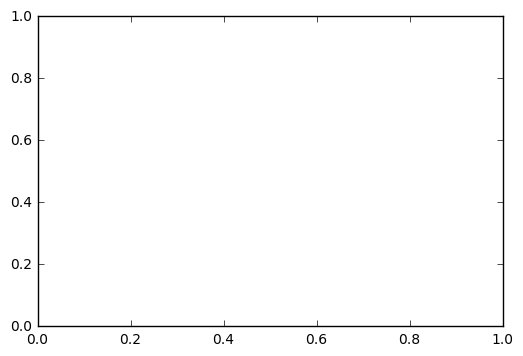

In [10]:
ax = betahat.value.plot()
plt.show(ax)

## The next step in the calculation...

In [ ]:
# simplify the representation of betahat:
betahat.symbolic = '\\hat{{\\beta}}'

In [ ]:
# sum betahat*temp across bins
mortality_defn = (betahat * temp).sum(dim='bins')

In [ ]:
mortality_defn.latex()

In [ ]:
mortality = mortality_defn.compute()

In [ ]:
mortality.value

Note that the dimensionality of mortality is less than beta and temp in the LaTeX and data:

In [ ]:
mortality.value

In [ ]:
ax = mortality.value.mean(dim='adm2').plot()
plt.show(ax)